In [1]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import sklearn as sk
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sb
import networkx as nx
import os
import sys
sys.path.append( '/Users/cdonnat/Dropbox/Pattern-analysis/')
import matplotlib.pyplot as plt
from shapes.shapes import *
import numpy as np
import networkx as nx 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import matplotlib.pyplot as plt
import sys
import seaborn as sb
import os
import sys
import matplotlib.pyplot as plt
sys.path.append( '../../Pattern-analysis/')
from shapes.shapes import *
from shapes.construct_graph import *
from shapes.shapes_generator import *
from shapes.structural_graph import *
from pattern_functions import *
import numpy as np
import networkx as nx 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import matplotlib.pyplot as plt
import sys
import seaborn as sb

#sys.path.append('/Users/cdonnat/Desktop/structural_equivalents/')
from distances_signature import *
from heat_diffusion import *
from clustering_via_distances import *
import graph_tools 
#from stats.statistic_checks import *
from purity import *
from characteristic_functions import *
from clustering_comparative_analysis import *
from cluster_analysis import *
from performance_evaluation import *

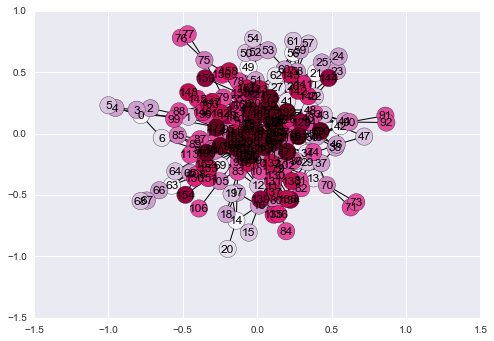

In [3]:
shape_list=[["fan",6]]*10+[["star",4]]*10+[["house"]]*10
G,roles, index_roles, label_shape=build_lego_structure_from_structure(shape_list, start=0,plot=True,savefig=False,graph_type='nx.barabasi_albert_graph', graph_args=[4],save2text='/Users/cdonnat/Desktop/structural_equivalents/graphs/WS_3_06plus30_',add_node=30)
L=Laplacian(nx.adjacency_matrix(G).todense(),'normalized')
A=nx.adjacency_matrix(G).todense()
k=2
D=100
N=G.number_of_nodes()
lambdas=np.linalg.eigvals(L)
List_patterns, List_neighbors=cut_laplacian(A,k)
taus=np.arange(0,100,1)

In [4]:
List_patterns

{0: array([ 0.21428571,  0.14285714,  0.10714286,  0.14285714,  0.10714286,
         0.07142857,  0.07142857,  0.03571429,  0.03571429,  0.03571429,
         0.03571429]),
 1: array([ 0.06521739,  0.04347826,  0.0326087 ,  0.0326087 ,  0.0326087 ,
         0.02173913,  0.01086957,  0.01086957,  0.0326087 ,  0.01086957,
         0.02173913,  0.01086957,  0.01086957,  0.04347826,  0.0326087 ,
         0.02173913,  0.02173913,  0.01086957,  0.01086957,  0.01086957,
         0.01086957,  0.01086957,  0.02173913,  0.01086957,  0.01086957,
         0.06521739,  0.01086957,  0.02173913,  0.01086957,  0.01086957,
         0.02173913,  0.01086957,  0.23913043,  0.0326087 ,  0.02173913]),
 2: array([ 0.23076923,  0.15384615,  0.11538462,  0.15384615,  0.11538462,
         0.07692308,  0.03846154,  0.03846154,  0.03846154,  0.03846154]),
 3: array([ 0.25      ,  0.08333333,  0.125     ,  0.16666667,  0.125     ,
         0.08333333,  0.04166667,  0.04166667,  0.08333333]),
 4: array([ 0.27272727,

In [5]:
chi_temp={i: characteristic_function(List_patterns[i],list(taus)) for i in List_patterns.keys()}
chi={i: list(chi_temp[i][:,1])+list(chi_temp[i][:,2]) for i in List_patterns.keys()}
train_features2=np.array([chi[i] for i in List_patterns.keys()])

In [6]:
km=KMeans(n_clusters=D)
km.fit(train_features2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
km.cluster_centers_.shape

(100, 200)

In [8]:
def kmeans_init(X,D):
    km=KMeans(n_clusters=D)
    km.fit(X)
    return km.cluster_centers_
    

In [15]:
X_in=train_features2

In [10]:
import torch

In [13]:
torch.Tensor(autograd.Variable(None))

[torch.FloatTensor with no dimension]

In [20]:
centroids=kmeans_init(X_in,D)

In [12]:
import torch # arrays on GPU
import torch.autograd as autograd #build a computational graph
import torch.nn as nn ## neural net library
import torch.nn.functional as F ## most non-linearities are here
import torch.optim as optim # optimization package

eta_T=torch.Tensor(1.0/D *(np.ones((D,))))
W_T=torch.Tensor(centroids)

W=autograd.Variable(W_T, requires_grad=True)
eta=autograd.Variable(eta_T, requires_grad=True)

NameError: name 'centroids' is not defined

In [31]:
inds=range(200)
np.random.shuffle(inds)
X_tilde=np.column_stack([X_in, X_in[inds,:]])

In [38]:
n=X_tilde.shape[1]//2
sigma=1

In [39]:
np.exp(-np.sum((X_tilde[:,:n]-X_tilde[:,n:])**2/(2*sigma),1)).shape


(200,)

In [44]:
expected_output=torch.Tensor(np.exp(-np.sum((X_tilde[:,:n]-X_tilde[:,n:])**2/sigma,1)))

In [120]:
expected_output.size()

torch.Size([200])

In [129]:
X_input=autograd.Variable(torch.Tensor(X_tilde), requires_grad=False)

In [157]:
X_input=autograd.Variable(torch.Tensor(X_tilde), requires_grad=True)
expected_output=autograd.Variable(torch.Tensor(np.exp(-np.sum((X_tilde[:,:n]-X_tilde[:,n:])**2/sigma,1))),requires_grad=False)
N=X_in.shape[0]
loss_func = nn.MSELoss()
learning_rate=10**(-3)
optimizer = optim.SGD([W,eta], lr = 1e-3) # instantiate optimizer with model params + learning rate
for t in range(1000):
    for i in range(N):
        output=(X_input[:,:n].repeat(1, D)-W.view(1,D*n).repeat(N, 1))**2+(X_input[:,n:].repeat(1, D)-W.view(1,D*n).repeat(N, 1))**2
        output2=output.view(N,D,n)
        output2=torch.exp(-1.0/sigma*torch.sum(output2,2))
        output2=torch.matmul(output2,eta)
        loss=loss_func(output2,expected_output)
        if t%15==0: print(t, loss.data[0])
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
    # Update weights using gradient descent; w1.data and w2.data are Tensors,
    # w1.grad and w2.grad are Variables and w1.grad.data and w2.grad.data are
    # Tensors.
    #W.data -= learning_rate * W.grad.data
    #eta.data -= learning_rate * eta.grad.data

    # Manually zero the gradients after updating weights
    #W.grad.data.zero_()
    #eta.grad.data.zero_()

(0, 0.01098614651709795)
(15, 0.010982816107571125)
(30, 0.010979486629366875)
(45, 0.010976158082485199)
(60, 0.010972827672958374)
(75, 0.010969501920044422)
(90, 0.010966177098453045)
(105, 0.010962853208184242)
(120, 0.01095952745527029)
(135, 0.010956202633678913)
(150, 0.01095288060605526)
(165, 0.010949557647109032)
(180, 0.010946236550807953)
(195, 0.010942915454506874)
(210, 0.010939594358205795)
(225, 0.01093627605587244)
(240, 0.010932954959571362)
(255, 0.010929636657238007)
(270, 0.010926319286227226)
(285, 0.010923001915216446)
(300, 0.01091968733817339)
(315, 0.010916370898485184)
(330, 0.010913060046732426)
(345, 0.010909751988947392)
(360, 0.010906443931162357)
(375, 0.010903136804699898)
(390, 0.010899829678237438)
(405, 0.010896525345742702)
(420, 0.010893220081925392)
(435, 0.010889916680753231)
(450, 0.010886610485613346)
(465, 0.010883308947086334)
(480, 0.010880010202527046)
(495, 0.010876711457967758)
(510, 0.010873415507376194)
(525, 0.010870114900171757)
(540,

In [165]:
X_input=autograd.Variable(torch.Tensor(X_tilde), requires_grad=True)
expected_output=autograd.Variable(torch.Tensor(np.exp(-np.sum((X_tilde[:,:n]-X_tilde[:,n:])**2/sigma,1))),requires_grad=False)
N=X_in.shape[0]
loss_func = nn.MSELoss()
learning_rate=10**(-3)
optimizer = optim.LBFGS([W,eta], lr = 1e-3) # instantiate optimizer with model params + learning rate
for t in range(100):
    for i in range(N):
        target=expected_output[i]
        def closure():
                optimizer.zero_grad()
                output=(X_input[i,:n].repeat(1, D)-W.view(1,D*n))**2+(X_input[i,n:].repeat(1, D)-W.view(1,D*n))**2
                output2=output.view(1,D,n)
                output2=torch.exp(-1.0/sigma*torch.sum(output2,2))
                output2=torch.matmul(output2,eta)
                loss = loss_func(output2, target)
                loss.backward()
                if t%15==0: print(t, loss.data[0])
                return loss
        optimizer.step(closure)
    #optimizer.step()
    # Update weights using gradient descent; w1.data and w2.data are Tensors,
    # w1.grad and w2.grad are Variables and w1.grad.data and w2.grad.data are
    # Tensors.
    #W.data -= learning_rate * W.grad.data
    #eta.data -= learning_rate * eta.grad.data

    # Manually zero the gradients after updating weights
    #W.grad.data.zero_()
    #eta.grad.data.zero_()

(0, 8.887920174314212e-28)
(0, 0.0)
(0, 9.204003878493516e-12)
(0, 6.451837543863803e-05)
(0, 1.66222660898388e-27)
(0, 0.0)
(0, 7.032564114384243e-11)
(0, 2.4582159587080524e-27)
(0, 2.742693872281555e-19)
(0, 0.0)
(0, 3.424097116955238e-11)
(0, 0.0)
(0, 5.758356829717726e-19)
(0, 7.909959265361977e-08)
(0, 0.06211958825588226)
(0, 0.0)
(0, 1.0)
(0, 1.8320731953735958e-07)
(0, 3.9368394367513394e-25)
(0, 1.3707258734272362e-17)
(0, 0.0)
(0, 7.744187513480938e-10)
(0, 0.0)
(0, 0.0)
(0, 6.049844653022163e-12)
(0, 2.1244075563368187e-13)
(0, 0.00017003602988552302)
(0, 1.6051961270943824e-33)
(0, 0.0)
(0, 8.965207851590869e-19)
(0, 0.002243614289909601)
(0, 1.401298464324817e-45)
(0, 4.1752808783329384e-40)
(0, 8.573450889102918e-39)
(0, 2.030687937804032e-07)
(0, 0.0)
(0, 4.158789621565155e-22)
(0, 3.7283546484725995e-21)
(0, 9.357604540127795e-06)
(0, 2.053723760148861e-16)
(0, 7.780631139375771e-10)
(0, 2.4061299191275237e-30)
(0, 2.3154062055265402e-30)
(0, 0.0)
(0, 0.0)
(0, 1.199946

In [166]:
output=(X_input[:,:n].repeat(1, D)-W.view(1,D*n).repeat(N, 1))**2+(X_input[:,n:].repeat(1, D)-W.view(1,D*n).repeat(N, 1))**2
output2=output.view(N,D,n)
output2=torch.exp(-1.0/sigma*torch.sum(output2,2))
output2=torch.matmul(output2,eta)
loss=loss_func(output2,expected_output)


In [143]:
loss_func = nn.MSELoss()
loss=loss_func(output2,expected_output)

In [167]:
loss

Variable containing:
1.00000e-02 *
  2.1881
[torch.FloatTensor of size 1]

In [81]:
torch.sum((X_input[:,:n].repeat(1, D)-W.view(1,D*n).repeat(X_in.shape[0], 1))**2,1)+\
                                            torch.sum((X_input[:,n:]-W[0,:].repeat(200, 1))**2,1)

Variable containing:
  30.4622
 154.5500
 114.9907
 124.7292
  44.6880
  69.6636
  17.4654
 111.0821
 163.9686
  90.7144
 143.0699
  73.4932
  43.2823
 168.5506
 142.6956
 106.9714
 153.3970
  21.3448
  97.5351
  17.8964
  90.0784
   8.0624
  74.7086
 197.9230
 153.6547
 165.5641
 105.9530
  99.3440
  66.4002
 110.4466
  25.7384
  96.9253
 100.0903
  82.4490
   4.7871
  53.1444
 144.9709
 116.0908
  11.1427
 146.2771
 157.7669
 160.4989
 218.3820
 100.0003
  79.7211
  47.6546
 104.6532
  42.7885
  79.5169
 137.2385
 211.7507
  42.0137
  26.9082
 161.7554
 138.6547
 104.6941
 108.4201
 129.8881
  44.7710
  61.1699
  22.9672
  76.9861
  13.9398
 125.4666
  59.9222
 145.9442
 136.6838
 144.6016
 160.9642
  99.9027
  45.1701
 125.5175
 148.8580
  14.2626
  41.1174
  88.4632
 100.2927
  19.0121
  43.4589
  16.6746
 142.9363
 135.1994
  48.6119
 196.5946
  34.8532
 124.2046
  16.3768
 216.1010
 153.2552
 101.8929
  84.4351
   0.3373
 164.1623
 207.4852
  93.0463
  85.3757
 152.9813
 165.0208

In [78]:
d=0
predicted_output[:,d]=torch.exp(-1.0/sigma*(torch.sum((X_input[:,:n]-W[0,:].repeat(200, 1))**2,1)+\
                                            torch.sum((X_input[:,n:]-W[0,:].repeat(200, 1))**2,1)))

RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.

In [80]:
for d in range(D):
    print d
    predicted_output[:,d]+=-1.0/sigma*((X_tilde[:,:n]-W[d,:])**2+(X_tilde[:,n:]-W[d,:])**2)

0


KeyboardInterrupt: 

In [ ]:
input_ = torch.Tensor(X_in)  ### define tensor


# define model
model = Log_reg_classifier(10,2)

# define loss function
loss_func = nn.MSELoss() 
loss_func = nn.MSELoss() #instantiate loss function
L=loss_func(z,y) # calculateMSE loss between output and target
print "Loss:", 


# define optimizer
optimizer = optim.LGSB(model.parameters(),lr=1e-1)

# send data through model in minibatches for 10 epochs
for epoch in range(10):
    for minibatch, target in data:
        model.zero_grad() # pytorch accumulates gradients, making them zero for each minibatch
        
        #forward pass
        out = model(autograd.Variable(minibatch))
        
        #backward pass 
        L = loss_func(out,target) #calculate loss
        L.backward() # calculate gradients
        optimizer.step() # make an update step